In [141]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [142]:
# Image path
path = r'mine_section.jpg'

(936, 1501, 3)


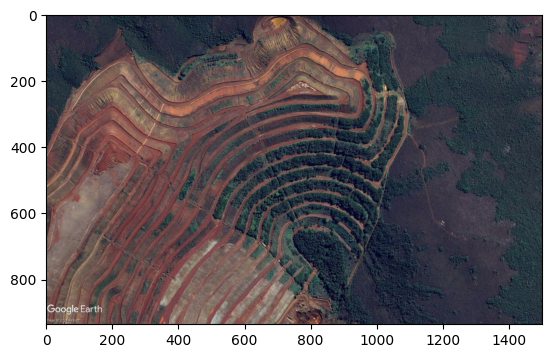

In [143]:
# Read and plot the image
image = mpl.image.imread(path)
print(image.shape)
plt.imshow(image)

In [144]:
# Reshape image info for a 1D array
reshaped_image = image.reshape(-1, 3)

In [145]:
# Cluster the image by their RGB
k = 2
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(reshaped_image)

KMeans(n_clusters=2, n_init=10)

In [146]:
# Create a data frame to store each pixel and its cluster
df = pd.DataFrame(reshaped_image, columns=['R', 'G', 'B'])
df['Cluster'] = kmeans.labels_
print(df.head(5))

    R   G   B  Cluster
0  44  45  63        0
1  39  40  58        0
2  44  43  59        0
3  41  40  56        0
4  45  42  59        0


In [147]:
# Re-create the image using the colors of the centers of the clusters
centers = kmeans.cluster_centers_
segmented_image = centers[kmeans.labels_.flatten()]
segmented_image = segmented_image.reshape(image.shape)

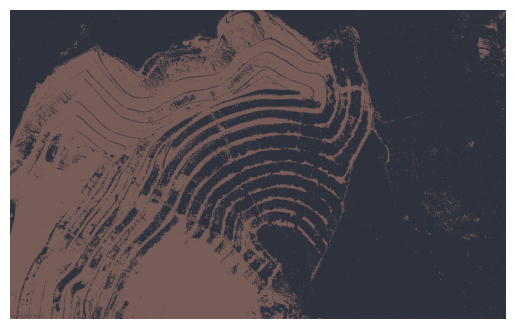

In [148]:
# Show image
plt.imshow(segmented_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [149]:
# Calculate the percentage of soil and vegetation in the area
percentage = (df['Cluster'].value_counts(normalize=True) * 100).round(2)
print(f'percentage of soil: {percentage[0]}')
print(f'percentage of vegetation: {percentage[1]}')

percentage of soil: 60.14
percentage of vegetation: 39.86
